# American Physics Society data <br> Cross Citations Network Map



## Important Notices

All instructions, code comments, etc. in this notebook **are only a recommendation**. That is, feel free to do your own analysis with the data.  


<div class="alert alert-block alert-success">
    There are two ways to access the data:
    <ul>
  <li>Via MongoDB</li>
  <li>Via REST api</li>
</ul>  
</div>

### data analysis
As a proposal, we aim here to clean the data in the cross citation dataframe from S3. 

    
### Helper functions

You are permitted to write additional helper functions, or use additional instance variables so long as the previously described functions work as required.

### Other Imports
<div class="alert alert-block alert-success">
    Please include here all the imports that are required!
</div>

In [578]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time

from chord import Chord
# from chart_studio import plotly

#### Function to connect to S3 bucket and download the csv file
<span style="color:red">*Please don't modify the below cell*</span>

In [185]:
df = pd.read_csv('https://s3.amazonaws.com/phiga.tech/aps-dataset-citations-2020.csv')
# df.head()

#### Function to check if database connection worked
<span style="color:red">*Please don't modify the below cell*</span>
<div>
<span style="color:green">*There should be 8850333 lines in the dataframe*</span>
</div>

In [186]:
len(df.index) == 8850333

True

#### Function to allow to run R inside a python notebook
<span style="color:red">*Please don't modify the below cell*</span>

<div class="alert alert-block alert-danger">
    please install rpy2 (pip install rpy2)
</div>

In [187]:
%load_ext rpy2.ipython
v = 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#### check if running 64 or 32 version
<span style="color:red">*Please don't modify the below cell*</span>

<div class="alert alert-block alert-danger">
    returns "32" for 32-bit and "64" for 64-bit. This is important as many of the citation data manipulation takes a lot of memory.
</div>

In [188]:
import struct
print(struct.calcsize("P")*8)

64


# Implementation for the functions: <br> data analysis

### helper function. `journal_grid_color()` function

In [189]:
def journal_grid_color():   
  
    # START YOUR CODE HERE ---------
    Journalgrid = [
        ['PR', 'PhysRev',"archive published by the American Physical Society. PROLA provides immediate access to the APS journal collection dating back to the first volume of each journal. A subscription to PROLA gives access to all journal content, except for the current year and the preceding three years"],
        ['PRA', 'PhysRevA', "Physical Review A (PRA) publishes important developments in the rapidly evolving areas of atomic, molecular, and optical (AMO) physics, quantum information, and related fundamental concepts."],
        ['PRAB', 'PhysRevAccelBeams', "Physical Review Accelerators and Beams (PRAB) covers the full spectrum of accelerator science, technology, and applications, including subsystems, component technologies, beam dynamics, and the design, operation, and improvement of scientific and industrial accelerators of all types."],     
        ['PRAPPLIED', 'PhysRevApplied', "Physical Review Applied (PRApplied) publishes high-quality papers that bridge the gap between engineering and physics, and between current and future technologies. PRApplied welcomes papers from both the engineering and physics communities, in academia and industry."],    
        ['PRB', 'PhysRevB', "Physical Review B (PRB) is the world’s largest dedicated physics journal, publishing approximately 100 new, high-quality papers each week. The most highly cited journal in condensed matter physics, PRB provides outstanding depth and breadth of coverage, combined with unrivaled context and background for ongoing research by scientists worldwide."],
        ['PRC','PhysRevC' ,'Physical Review C (PRC) is a leading journal in theoretical and experimental nuclear physics, publishing more than two-thirds of the research literature in the field.'],
        ['PRD',  'PhysRevD','Physical Review D (PRD) is a leading journal in elementary particle physics, field theory, gravitation, and cosmology and is one of the top-cited journals in high-energy physics.'],
        ['PRE',    'PhysRevE' ,'Physical Review E (PRE) is a broad and interdisciplinary journal focusing on collective phenomena of many-body systems. As the premier journal in the interrelated areas of statistical, nonlinear, biological, and soft matter physics, PRE covers recent developments in complex fluids, polymers, liquid crystals, and granular materials. The journal also includes sections on solid mechanics, fluid dynamics, plasma physics, computational physics, networks, and complex systems.'],
        ['PRFLUIDS', 'PhysRevFluids','Physical Review Fluids (PRFluids) is dedicated to publishing innovative research that will significantly advance the fundamental understanding of fluid dynamics. PRFluids embraces both traditional fluid dynamics topics and newer areas, such as bio-related fluid dynamics, micro- and nanoscale flows, fluid mechanics of complex fluids and soft materials, and geophysical and environmental flows.'],
        ['PRI', 'PhysRevSeriesI', 'PROLA provides immediate access to the APS journal collection dating back to the first volume of each journal. A subscription to PROLA gives access to all journal content, except for the current year and the preceding three years.'],
        ['PRL', 'PhysRevLett','Physical Review Letters (PRL) is the world’s premier physics letter journal and the American Physical Society’s flagship publication. Since 1958 it has contributed to APS’s mission to advance and diffuse the knowledge of physics by publishing seminal research by Nobel Prize–winning and other distinguished researchers in all fields of physics.'],  
        ['PRMATERIALS', 'PhysRevMaterials','Physical Review Materials (PRMaterials), launched in 2017, is a broad-scope journal publishing high-quality research on materials. The journal serves the multidisciplinary community working on the prediction, synthesis, processing, structure, properties, and modeling of a wide range of materials.'],
        ['PRPER', 'PhysRevPhysEducRes','Physical Review Physics Education Research (PRPER) covers the full array of experimental and theoretical research relating to the teaching and learning of physics and astronomy. PRPER is the only fully open access journal for physics education research.'],
        ['PRRESEARCH','PhysRevResearch','Physical Review Research (PRResearch) is a fully open access, peer-reviewed journal welcoming the full spectrum of research topics of interest to the physics community and offering authors and readers the Physical Review experience and quality they value and trust.'],
        ['PRSTAB',  'PhysRevSTAB',"Physical Review Accelerators and Beams (PRAB) covers the full spectrum of accelerator science, technology, and applications, including subsystems, component technologies, beam dynamics, and the design, operation, and improvement of scientific and industrial accelerators of all types."],
        ['PRSTPER', 'PhysRevSTPER','Physical Review Physics Education Research (PRPER) covers the full array of experimental and theoretical research relating to the teaching and learning of physics and astronomy. PRPER is the only fully open access journal for physics education research.'],
        ['PRX', 'PhysRevX','Physical Review X (PRX) is an online-only, fully open access journal that places a high value on innovation, quality, and long-term impact in the science it publishes. It seeks to publish a select set of papers from all areas of pure, applied, and interdisciplinary physics that have the potential to influence current and future research and to have a long-lasting and profound impact in their relevant fields.'],
        ['PRXQUANTUM', 'PRXQuantum','PRX Quantum is a highly selective, online-only, fully open access journal that publishes research with an emphasis on outstanding and lasting impact. PRX Quantum seeks to publish a select set of papers providing a home for and connection between the numerous research communities that make up quantum information science and technology, spanning from pure science to engineering to computer science and beyond.'],
        ['RMP','RevModPhys','Reviews of Modern Physics (RMP) is the world’s premier physics review journal and the most highly cited Physical Review publication. Written by leading international researchers, RMP’s in-depth essays provide outstanding coverage of a topic and give context and background for current research trends.'],    
        ['PHYSICS','Physics', 'Physics provides daily online-only news and commentary about a selection of papers from the APS journal collection. The website is aimed at the reader who wants to keep up with highlights of physics research with explanations that don’t rely on jargon and technical detail.'],
        ['PRFOCUS', 'PhysRevFocus','PR Focus is a FREE APS electronic journal featuring highlights of selected Physical Review Letters accessible to all physicists. The editor is David Ehrenstein [see April 1998 APS News]. APS News will print samplings from PR Focus over the next few issues to introduce the membership to this new journal. To receive one-paragraph introductions to Focus stories each week by e-mail, send the following message to majordomo@aps.org: subscribe focus [Leave the subject line blank].'],
        ['PPF', 'PhysicsPhysiqueFizika','As a service to the community, APS has made the small journal “Physics Physique физика” freely available online. The journal published fewer than 100 articles during the period 1964-1968 in four volumes. In their Editorial Foreword, founding editors P. W. Anderson and B. T. Matthias explain that the experimental journal aimed to “alleviate the increasing problems of the communication of science.” During its brief run, the journal published papers by many notable physicists.']
    ]

    columns_colors = ['PR', 'PRA', 'PRAB', 'PRAPPLIED', 'PRB', 'PRC', 'PRD', 'PRE',
           'PRFLUIDS', 'PRI', 'PRL', 'PRMATERIALS', 'PRPER', 'PRRESEARCH',
           'PRSTAB', 'PRSTPER', 'PRX', 'PRXQUANTUM', 'RMP']
    colors_check = []
    for x in Journalgrid[0:19]:
        index_val = columns_colors.index(x[0])
        colors = sns.color_palette("hls", 19)
        colors_check.append(colors[index_val])

    for x in Journalgrid[19:]:
        colors_check.append((0,0,0))

    Journalgriddf = pd.DataFrame(Journalgrid, columns=['id', 'Journal', 'About'])
    Journalgriddf['colour'] = colors_check
    result = Journalgriddf
    
    # END YOUR CODE HERE -----------
    
    return result

In [190]:
# check:
journalGrid = journal_grid_color()
journalGrid

id                Journal  \
0            PR                PhysRev   
1           PRA               PhysRevA   
2          PRAB      PhysRevAccelBeams   
3     PRAPPLIED         PhysRevApplied   
4           PRB               PhysRevB   
5           PRC               PhysRevC   
6           PRD               PhysRevD   
7           PRE               PhysRevE   
8      PRFLUIDS          PhysRevFluids   
9           PRI         PhysRevSeriesI   
10          PRL            PhysRevLett   
11  PRMATERIALS       PhysRevMaterials   
12        PRPER     PhysRevPhysEducRes   
13   PRRESEARCH        PhysRevResearch   
14       PRSTAB            PhysRevSTAB   
15      PRSTPER           PhysRevSTPER   
16          PRX               PhysRevX   
17   PRXQUANTUM             PRXQuantum   
18          RMP             RevModPhys   
19      PHYSICS                Physics   
20      PRFOCUS           PhysRevFocus   
21          PPF  PhysicsPhysiqueFizika   

                                                About  \
0   archive published by the American Physical Soc...   
1   Physical Review A (PRA) publishes important de...   
2   Physical Review Accelerators and Beams (PRAB) ...   
3   Physical Review Applied (PRApplied) publishes ...   
4   Physical Review B (PRB) is the world’s largest...   
5   Physical Review C (PRC) is a leading journal i...   
6   Physical Review D (PRD) is a leading journal i...   
7   Physical Review E (PRE) is a broad and interdi...   
8   Physical Review Fluids (PRFluids) is dedicated...   
9   PROLA provides immediate access to the APS jou...   
10  Physical Review Letters (PRL) is the world’s p...   
11  Physical Review Materials (PRMaterials), launc...   
12  Physical Review Physics Education Research (PR...   
13  Physical Review Research (PRResearch) is a ful...   
14  Physical Review Accelerators and Beams (PRAB) ...   
15  Physical Review Physics Education Research (PR...   
16  Physical Review X (PRX) is an online-only, ful...   
17  PRX Quantum is a highly selective, online-only...   
18  Reviews of Modern Physics (RMP) is the world’s...   
19  Physics provides daily online-only news and co...   
20  PR Focus is a FREE APS electronic journal feat...   
21  As a service to the community, APS has made th...   

                                              colour  
0                (0.86, 0.3712, 0.33999999999999997)  
1    (0.86, 0.5354105263157893, 0.33999999999999997)  
2    (0.86, 0.6996210526315789, 0.33999999999999997)  
3    (0.8561684210526316, 0.86, 0.33999999999999997)  
4    (0.6919578947368422, 0.86, 0.33999999999999997)  
5    (0.5277473684210525, 0.86, 0.33999999999999997)  
6   (0.36353684210526294, 0.86, 0.33999999999999997)  
7    (0.33999999999999997, 0.86, 0.4806736842105263)  
8    (0.33999999999999997, 0.86, 0.6448842105263157)  
9    (0.33999999999999997, 0.86, 0.8090947368421053)  
10   (0.33999999999999997, 0.7466947368421052, 0.86)  
11   (0.33999999999999997, 0.5824842105263155, 0.86)  
12  (0.33999999999999997, 0.41827368421052624, 0.86)  
13   (0.4259368421052626, 0.33999999999999997, 0.86)  
14   (0.5901473684210526, 0.33999999999999997, 0.86)  
15   (0.7543578947368419, 0.33999999999999997, 0.86)  
16   (0.86, 0.33999999999999997, 0.8014315789473682)  
17   (0.86, 0.33999999999999997, 0.6372210526315789)  
18  (0.86, 0.33999999999999997, 0.47301052631578955)  
19                                         (0, 0, 0)  
20                                         (0, 0, 0)  
21                                         (0, 0, 0)

### 1. `clean_data()` function

In [191]:
def clean_data(dataframe, journalGrid):
    
    # START YOUR CODE HERE ---------
    
    start_time = time.time()
    
    newnodes = []
    for x in range(len(df.index)):
#     for x in range(100000):
#         if(x%1000000==0):
#             print("STAUTS >>>> "+ str(round(x*1/len(df.index)*100,2))+"  ct: " + str(time.time()-start_time))
        
        new_node1 = dataframe['citing_doi'][x]
        s1 = new_node1
        sn = s1[s1.find('/')+1:]
        new_journal_id1 = sn[0:sn.find('.')]

        new_node2 = dataframe['cited_doi'][x]
        s2 = new_node2
        sn = s2[s2.find('/')+1:]
        new_journal_id2 = sn[0:sn.find('.')]
        
#         print(journalGrid[journalGrid['Journal']==new_journal_id1]['id'])

        if (
            (new_journal_id1 != new_journal_id2) and 
            (new_journal_id1 not in ['Physics','PhysRevFocus','PhysicsPhysiqueFizika']) and
            (new_journal_id2 not in ['Physics','PhysRevFocus','PhysicsPhysiqueFizika'])
            ):
#             new_journal_id1 = list(journalGrid[journalGrid['Journal']==new_journal_id1]['id'])[0]
#             new_journal_id2 = list(journalGrid[journalGrid['Journal']==new_journal_id2]['id'])[0]
            newnodes.append([str(new_journal_id1),str(new_journal_id2)])
    
    results = pd.DataFrame(newnodes, columns=['from','to']).astype(np.uint8,errors='ignore')
    
    # END YOUR CODE HERE -----------
    
    del dataframe
    del journalGrid
    del newnodes
    return results


In [192]:
# check:
df = clean_data(df,journalGrid)
df

from               to
0           PhysRevE   PhysRevSeriesI
1           PhysRevB   PhysRevSeriesI
2            PhysRev   PhysRevSeriesI
3           PhysRevB   PhysRevSeriesI
4        PhysRevLett   PhysRevSeriesI
...              ...              ...
4160275     PhysRevA         PhysRevX
4160276     PhysRevD  PhysRevResearch
4160277     PhysRevA      PhysRevLett
4160278  PhysRevLett         PhysRevA
4160279     PhysRevA  PhysRevResearch

[4160280 rows x 2 columns]

In [111]:
# check

# cross_matrix

### 2. `cross_map()` function

In [205]:
def cross_map(dataframe, journalGrid):
    
    # START YOUR CODE HERE ---------
    
    cross_matrix = pd.crosstab(dataframe['from'],dataframe['to'])
    
    name_change = {}
    for data in range(len(journalGrid[['id','Journal']])):
        name_change[str(journalGrid['Journal'][data])] = str(journalGrid['id'][data])
        
    cross_matrix = cross_matrix.rename(columns=name_change,index=name_change)
    results = cross_matrix
    
    # END YOUR CODE HERE -----------

    return results


In [372]:
# check
# cross_data = cross_map(df,journalGrid)
# cross_data

In [575]:
links_df = df
links_df=links_df.rename(columns={'from': 'source', 'to': 'target'})
links_df = links_df.groupby(['source','target'], as_index=False).count()
links_df=links_df.replace(name_change)


# links_df['value'] = links_df['source'].div(links_df['target'].map(links_df.target.value_counts()))
links_df['value'] = links_df['value']
links_df

source       target  value
0    PRXQUANTUM           PR     30
1    PRXQUANTUM          PRA    501
2    PRXQUANTUM    PRAPPLIED     45
3    PRXQUANTUM          PRB    205
4    PRXQUANTUM          PRD     43
..          ...          ...    ...
230         RMP          PRL  46275
231         RMP  PRMATERIALS     10
232         RMP   PRRESEARCH     17
233         RMP       PRSTAB    234
234         RMP          PRX    325

[235 rows x 3 columns]

### 6. `journal_correlation()` function

<br>

<div class="row">
Idea here is to create a map with "from" "to"
</div>

<div class="row">
    <img src="./fig/img2.png" style="width:150px; float: left;" />
</div>
    
<div class="row">
and build a Hierarchical edge bundling.
</div>
    
<div class="row"> 
    <img align="left" src="./fig/img1.png" style="width:300px;float: left;" />
</div>

<div class="row">
link: <a href="https://www.r-graph-gallery.com/hierarchical-edge-bundling">https://www.r-graph-gallery.com/hierarchical-edge-bundling</a>
</div>

<div class="alert alert-block alert-success">
    IDEA: 
<ul>
  <li>(group 1, group 2, ...) = journal.id</li>
  <li>(a,b,c ...) = year (or decade) ... or maybe the year is not relevent at all</li>
</ul>
</div>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
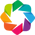

:Chord   [source,target]   (value)

In [577]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim

hv.extension('bokeh')
hv.output(size=200)

nodes = list(pd.DataFrame(journalGrid['id']))

chord = hv.Chord((links_df))
chord.opts(label_text_font_size='12pt')
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels=dim('index').str(), node_color=dim('index').str()))